In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset
df = pd.read_csv("forestfires.csv")

# Convert month and day to categorical for better ordering
df['month'] = pd.Categorical(df['month'], 
                             categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                             ordered=True)
df['day'] = pd.Categorical(df['day'],
                           categories=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'],
                           ordered=True)

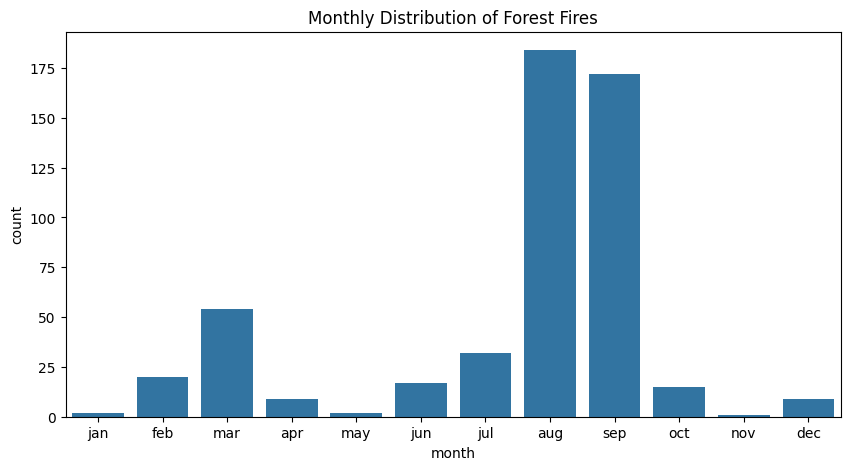

In [5]:
# 1. Monthly distribution of forest fires
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='month', order=df['month'].cat.categories)
plt.title('Monthly Distribution of Forest Fires')
plt.show()

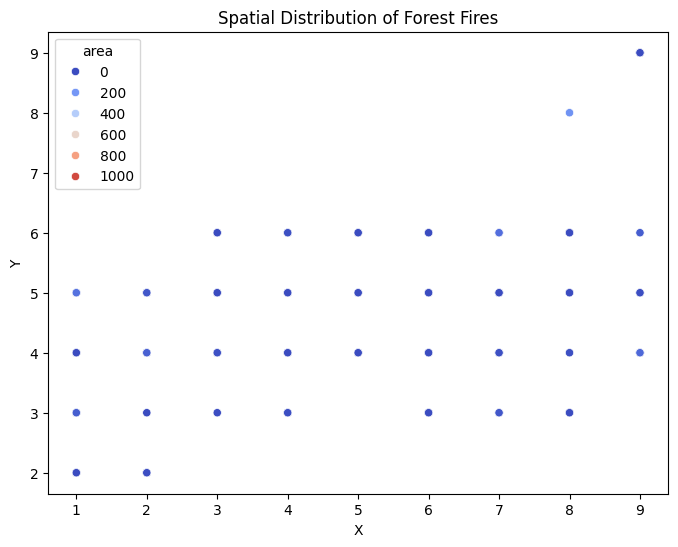

In [6]:
# 2. Spatial distribution of fires
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='X', y='Y', hue='area', palette='coolwarm')
plt.title('Spatial Distribution of Forest Fires')
plt.show()

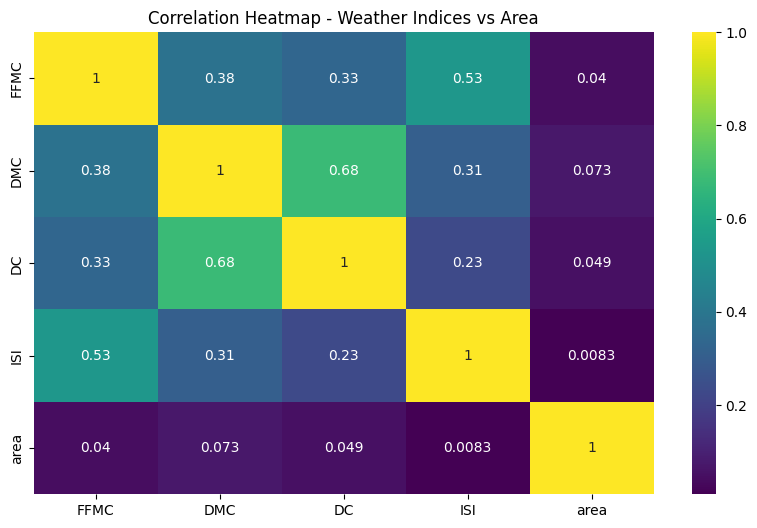

In [7]:
# 3. Correlation between weather indices and area
plt.figure(figsize=(10,6))
sns.heatmap(df[['FFMC','DMC','DC','ISI','area']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap - Weather Indices vs Area')
plt.show()

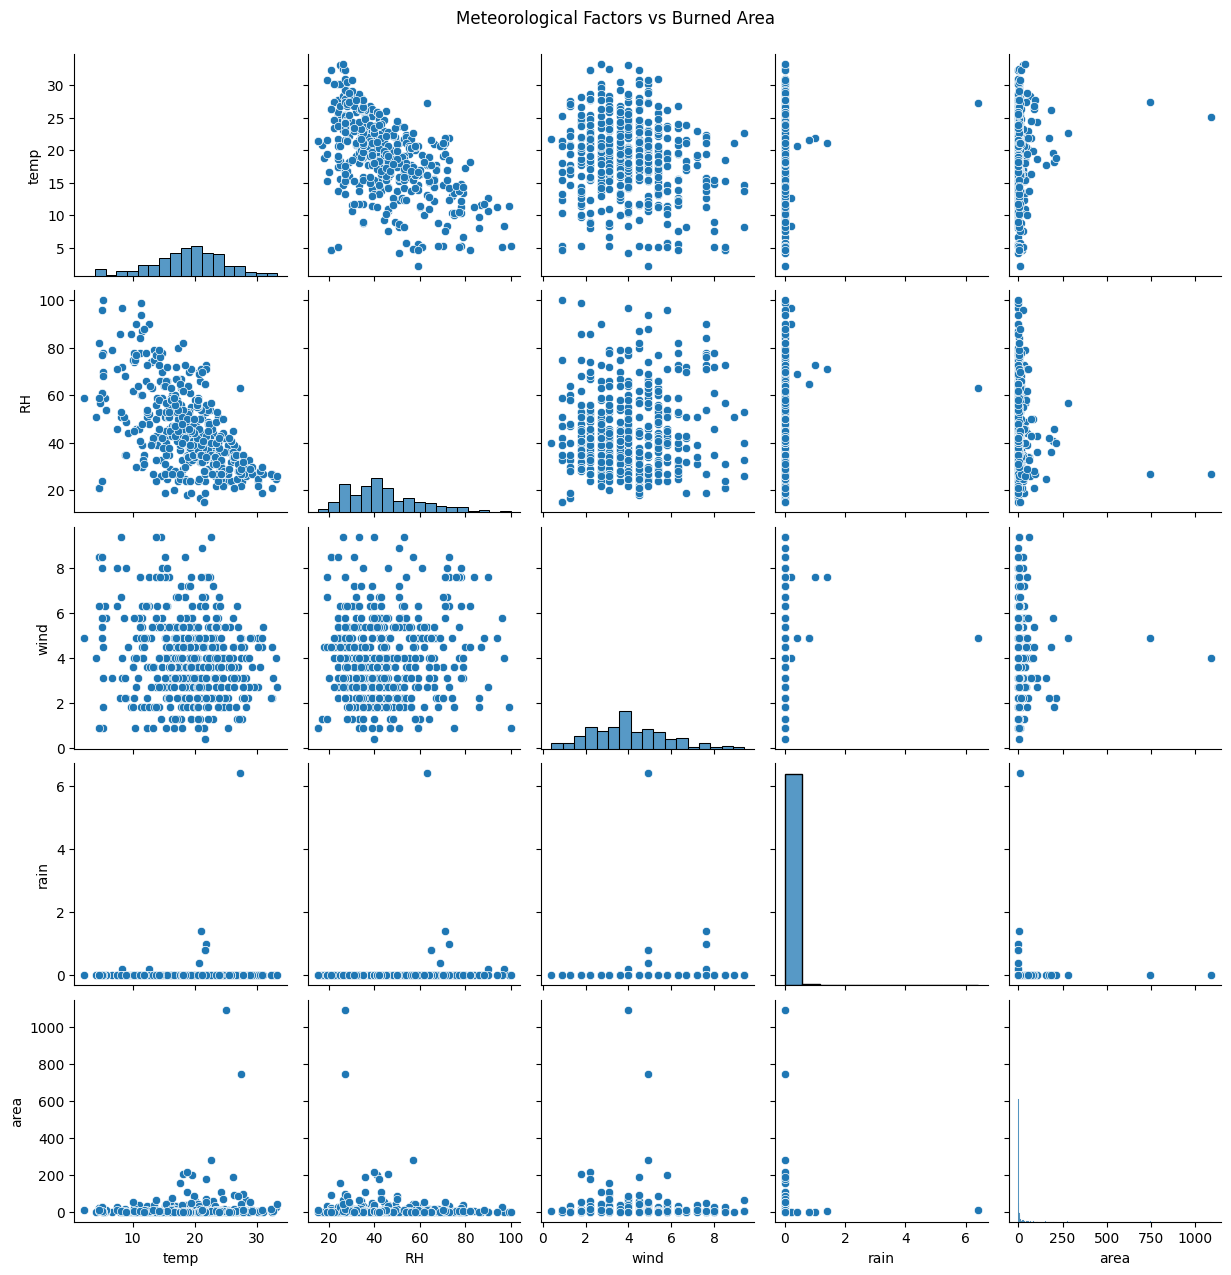

In [8]:
# 4. Influence of meteorological factors
sns.pairplot(df[['temp', 'RH', 'wind', 'rain', 'area']])
plt.suptitle('Meteorological Factors vs Burned Area', y=1.02)
plt.show()

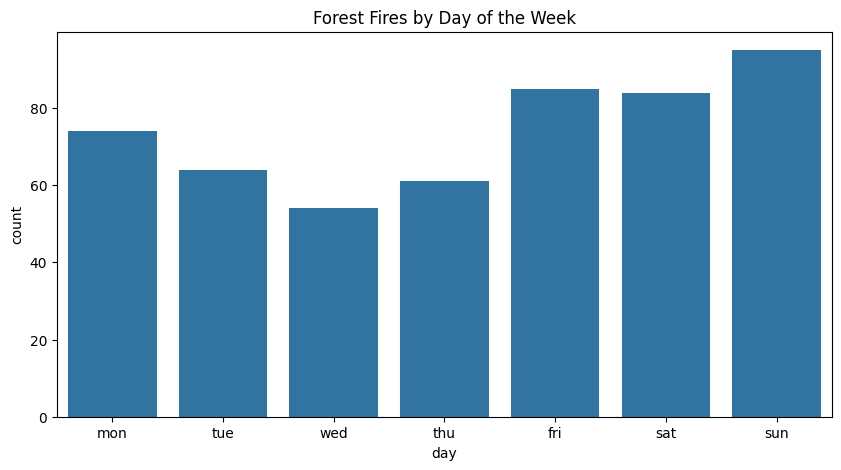

In [9]:
# 5. Fires by day of the week
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day', order=df['day'].cat.categories)
plt.title('Forest Fires by Day of the Week')
plt.show()

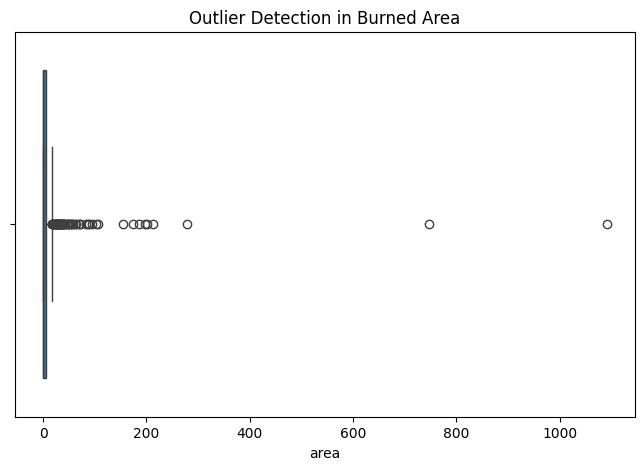

In [10]:
# 6. Outlier detection for burned area
plt.figure(figsize=(8,5))
sns.boxplot(x=df['area'])
plt.title('Outlier Detection in Burned Area')
plt.show()

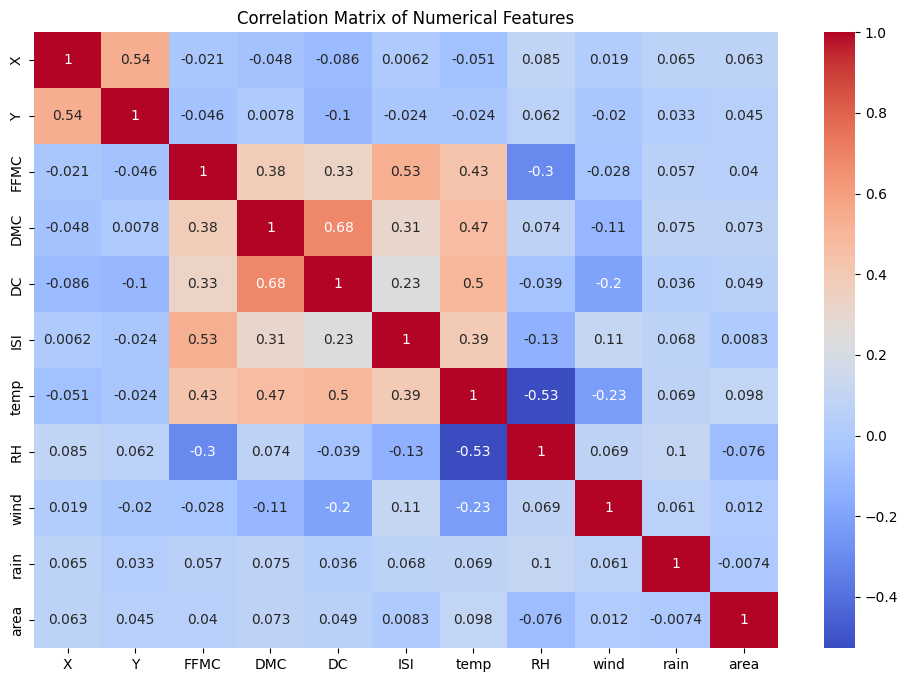

In [12]:
# 7. Correlation among all numerical variables
numerical_df = df.select_dtypes(include=[np.number])  # Only numeric columns

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


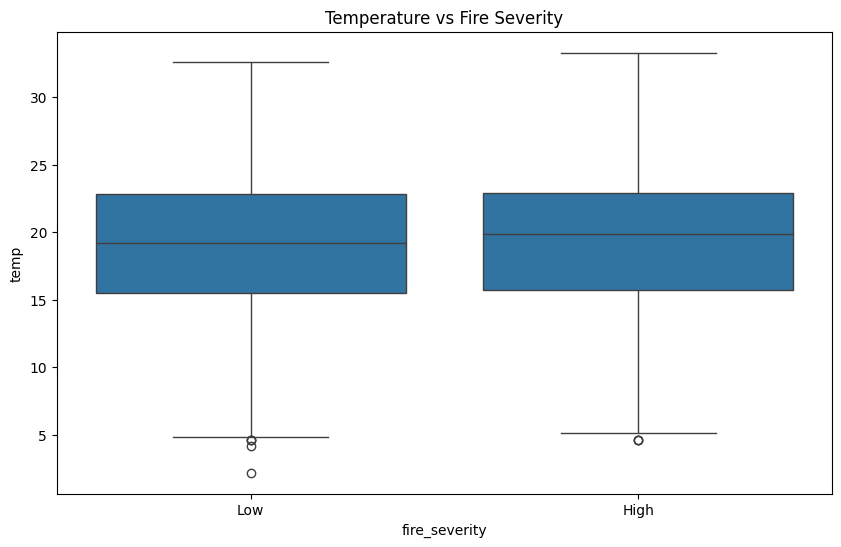

In [13]:
# 8. Compare high and low severity fires
df['fire_severity'] = np.where(df['area'] > 10, 'High', 'Low')
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='fire_severity', y='temp')
plt.title("Temperature vs Fire Severity")
plt.show()

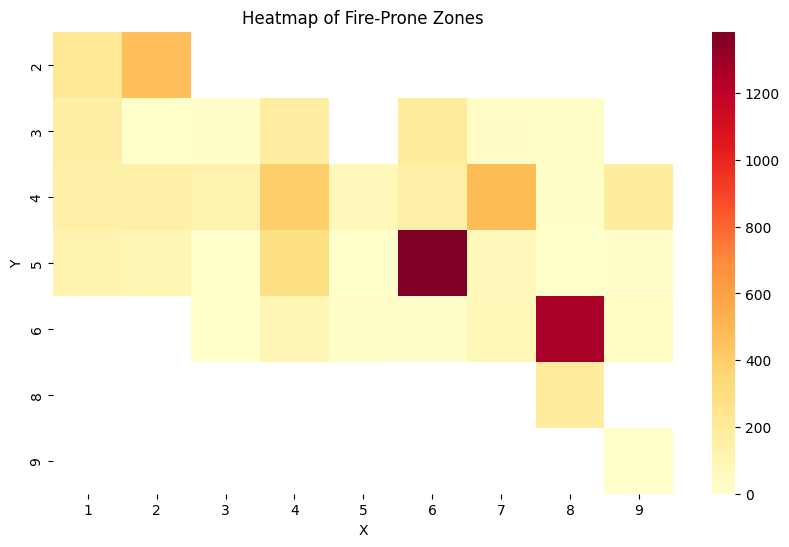

In [18]:
# 9. Heatmap of fire-prone zones
pivot = df.pivot_table(values='area', index='Y', columns='X', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="YlOrRd")
plt.title('Heatmap of Fire-Prone Zones')
plt.show()